# Exercise 3

Check if regularization may improve the performances by varying the parameter lambda (as usual in magnitude: 0, 10-5, 10-4, 10-3, etc.) of the L1 (LASSO) or of the L2 (Ridge) regularization; see lambda in eqs.(43) and (52) in the review. There is also a mixed version (l1_l2) that can be tried.3.1 Are performances of the CNN are optimized at some intermediate value of lambda?3.2 Is there any improvement in the visualization and understanding of the weights in thefilters?Note that the regularization we introduced acts on the w’s, not on the biases. One can alsotry the equivalent procedure for biases or for the output of the relu units (see Keras doc.), ifthere is any reason for suspecting that it may help. In our case, the logic was to let theweights of the filters go to zero if not needed, hence that kind of regularization was selected.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
import pandas as pd

%run plot.py

### Read data

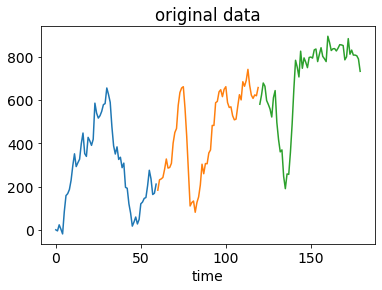

data:  10000
10000 60


In [2]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000.dat'
fnamex='DATA/x_'+str0
fnamey='DATA/y_'+str0

x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
N,L = len(x), len(x[0])

Show_data(x,L,"original data")

categ = np.loadtxt(fnamey, dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)

y = np.zeros((N,n_class))
for i in range(N):
    y[i][categ[i]] = 1.

print(N, L)

### Rescale data, split train/val.

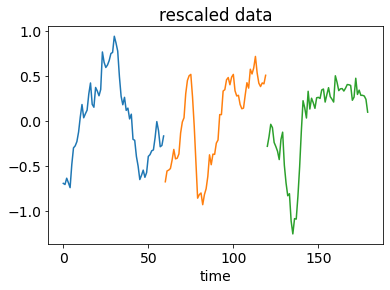

N_train= 8000   N_val= 2000   L= 60   n_class= 3


In [3]:
#
#  FIRST PASSAGE:  DO NOT DO THIS --> FAILURE 
#
#remove average value of each sample from its values
xm = x.mean(axis=1)
for i in range(N):
    x[i] = x[i]-xm[i]

#
#  SECOND PASSAGE:  DO NOT DO THIS --> ALSO FAILURE 
#
#rescale (crude version, variance should be used)
x = x/400
    
Show_data(x,L,"rescaled data")

perc_train=0.8
N_train = int(perc_train*N)
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]
N_val = len(x_val)
print('N_train=',N_train,'  N_val=',N_val,'  L=',L,'  n_class=',n_class)

#x_train=x_train.astype("float32")
#y_train=y_train.astype("float32")
#x_val=x_val.astype("float32")
#y_val=y_val.astype("float32")

# Keras wants an additional dimension with a 1 at the end
x_train = x_train.reshape(x_train.shape[0], L, 1)
x_val =  x_val.reshape(x_val.shape[0], L, 1)
input_shape = (L, 1)

## Convolutional NN

In [4]:
from keras import initializers, regularizers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


def create_CNN(n_class, reg, lam, fil, k_size, Poolsize, bias_reg, act_reg):
    ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

    model = Sequential()
    if bias_reg == True:        
        model.add(Conv1D(filters = fil, kernel_size = k_size[0],
                            kernel_regularizer = reg(lam),
                            kernel_initializer=ini,
                            bias_regularizer = reg(lam),
                            bias_initializer = ini,
                            activation = "relu",
                            input_shape = input_shape
                            ))
    elif act_reg == True:    
        model.add(Conv1D(filters = fil, kernel_size = k_size[0],
                            kernel_regularizer = reg(lam),
                            kernel_initializer=ini,
                            activity_regularizer = reg(lam),
                            activation = "relu",
                            input_shape = input_shape
                            ))
    else:     
        model.add(Conv1D(filters = fil, kernel_size = k_size[0],
                            kernel_regularizer = reg(lam),
                            kernel_initializer=ini,
                            activation = "relu",
                            input_shape = input_shape
                            ))
        
    model.add(MaxPooling1D(Poolsize))
    #model.add(AveragePooling1D(Poolsize))
    model.add(Conv1D(filters = fil, kernel_size = k_size[1], activation = "relu"))
    #model.add(MaxPooling1D(Poolsize))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_class, activation='softmax')) # softmax !
    
    return model

In [5]:
def compile_model(n_class = 3, reg = regularizers.l2, lam = 0.001, fil = 5, 
                  k_size = [11, 7], Poolsize = 5, bias_reg = False, act_reg = False):
    # create the mode
    model=create_CNN(n_class, reg, lam, fil, k_size, Poolsize, bias_reg, act_reg)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])
    return model

In [6]:
# ...LESSON ...
# reproducibility
import tensorflow.random as tf_r
tf_r.set_seed(12345)

NCONV = 1
NF = 5
'''
model_gridsearch = KerasClassifier(build_fn=compile_model)

# define parameter dictionary
reg = [regularizers.l1, regularizers.l2, regularizers.l1_l2]
lam = [0.1,0.01,0.001,0.0001]
param_grid = dict(reg = reg , lam = lam)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=250, batch_size = 250, shuffle = True, verbose = 0)'''

'\nmodel_gridsearch = KerasClassifier(build_fn=compile_model)\n\n# define parameter dictionary\nreg = [regularizers.l1, regularizers.l2, regularizers.l1_l2]\nlam = [0.1,0.01,0.001,0.0001]\nparam_grid = dict(reg = reg , lam = lam)\n\n# call scikit grid search module\ngrid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)\ngrid_result = grid.fit(x_train,y_train, epochs=250, batch_size = 250, shuffle = True, verbose = 0)'

In [7]:
'''
results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('results_DATA/GridSearchResults_New.csv')'''

"import pandas as pd\nresults = pd.DataFrame.from_dict(grid_result.cv_results_)\nresults.to_csv('GridSearchResults_New.csv')"

In [16]:
results = pd.read_csv('results_DATA/GridSearchResults_New.csv')
best_result = results[results["rank_test_score"] == 1]
best_result

reg_best = regularizers.l1_l2#best_result.param_reg.values[0]
lam_best  = float(best_result.param_lam.values[0])
print(reg_best, lam_best)

<function l1_l2 at 0x7f31ca486200> 0.0001


In [19]:
BATCH_SIZE = 250
EPOCHS = 100

model      = compile_model(reg=reg_best ,lam=lam_best)
fit = model.fit(x_train,y_train,batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_val, y_val),
                verbose=2, shuffle=True) 

Epoch 1/100
32/32 - 1s - loss: 1.0947 - accuracy: 0.4038 - val_loss: 1.0876 - val_accuracy: 0.4935 - 914ms/epoch - 29ms/step
Epoch 2/100
32/32 - 0s - loss: 1.0677 - accuracy: 0.4593 - val_loss: 1.0420 - val_accuracy: 0.4935 - 192ms/epoch - 6ms/step
Epoch 3/100
32/32 - 0s - loss: 0.9998 - accuracy: 0.5119 - val_loss: 0.9501 - val_accuracy: 0.5550 - 194ms/epoch - 6ms/step
Epoch 4/100
32/32 - 0s - loss: 0.9062 - accuracy: 0.5822 - val_loss: 0.8449 - val_accuracy: 0.6790 - 199ms/epoch - 6ms/step
Epoch 5/100
32/32 - 0s - loss: 0.8192 - accuracy: 0.6599 - val_loss: 0.7478 - val_accuracy: 0.7265 - 202ms/epoch - 6ms/step
Epoch 6/100
32/32 - 0s - loss: 0.7270 - accuracy: 0.7260 - val_loss: 0.6560 - val_accuracy: 0.7905 - 199ms/epoch - 6ms/step
Epoch 7/100
32/32 - 0s - loss: 0.6434 - accuracy: 0.7796 - val_loss: 0.5696 - val_accuracy: 0.8325 - 200ms/epoch - 6ms/step
Epoch 8/100
32/32 - 0s - loss: 0.5631 - accuracy: 0.8148 - val_loss: 0.4788 - val_accuracy: 0.8655 - 196ms/epoch - 6ms/step
Epoch 9

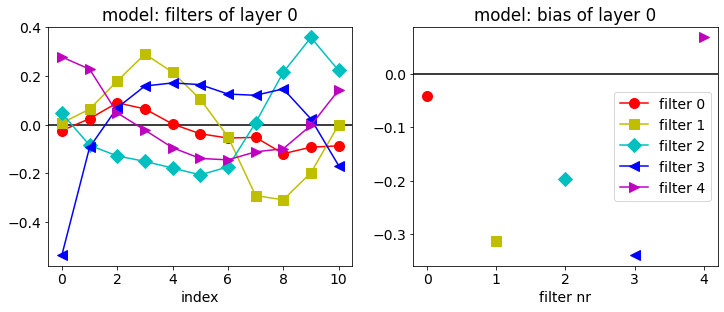

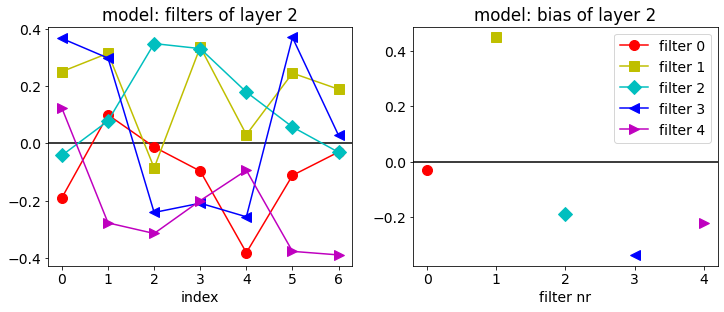

In [21]:
def Show_weights(model,l=0,label="model"):
    c=['r','y','c','b','m']
    m=['o','s','D','<','>']
    ms=10
    
    w = model.layers[l].get_weights()[0]
    wT=w.T
    M=len(wT)
    b = model.layers[l].get_weights()[1]
    
    fig,AX=plt.subplots(1,2,figsize=(12,4.4))
    ax=AX[0]
    ax.axhline(0, c="k")
    ax.plot((0,))
    for i in range(M):
        ax.plot(wT[i][0],"-",c=c[i],marker=m[i],label=str(i),markersize=ms)
    ax.set_title(label+': filters of layer '+str(l))
    ax.set_xlabel('index')
    ax=AX[1]
    ax.axhline(0, c="k")
    for i in range(M):
        ax.plot((i),(b[i]),c=c[i],marker=m[i],label="filter "+str(i),markersize=ms)
    ax.set_title(label+': bias of layer '+str(l))
    ax.set_xlabel('filter nr')
    ax.set_xticks(np.arange(5))
    ax.legend()
    plt.show()
    
Show_weights(model,0)
Show_weights(model,2)

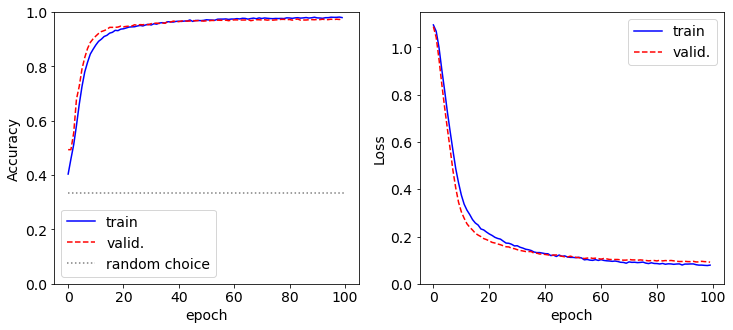

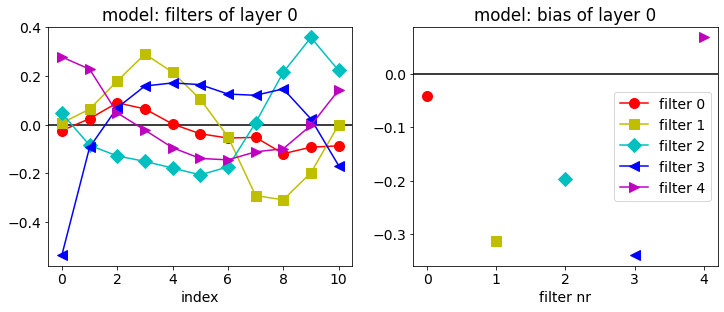

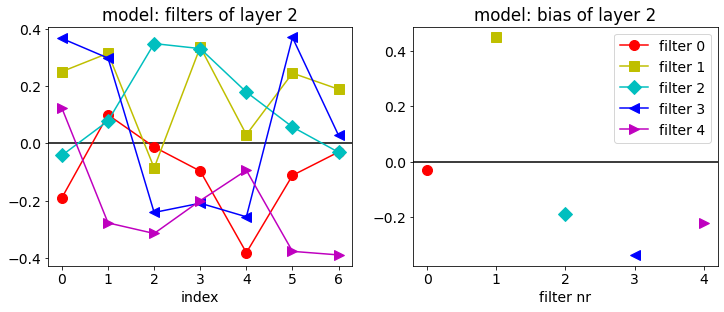

In [22]:
def Show_history(fit):
    fig,AX=plt.subplots(1,2,figsize=(12,5.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],"b",label="train")
    ax.plot(fit.history['val_accuracy'],"r--",label="valid.")
    ax.plot((0,EPOCHS),(1/3,1/3),":",c="gray",label="random choice")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.set_ylim([0, 1])
    ax.legend()
    ax=AX[1]
    ax.plot(fit.history['loss'],"b",label="train")
    ax.plot(fit.history['val_loss'],"r--",label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.set_ylim([0, 1.05*np.max(fit.history['loss'])])
    ax.legend()
    plt.show()
Show_history(fit)
Show_weights(model,0)
Show_weights(model,2)

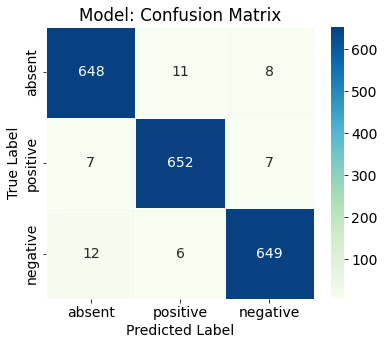

In [27]:
import pandas as pd
from scipy import stats

import seaborn 
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn import preprocessing

LABELS = ["absent","positive","negative"]
cmap="GnBu"

def show_confusion_matrix(validations, predictions, label="Model"):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 5))
    seaborn.heatmap(matrix,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d',
                linecolor='white',
                linewidths=1,
                cmap=cmap)
    plt.title(label+': Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_val = model.predict(x_val)
# Take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)

show_confusion_matrix(max_y_val, max_y_pred_val)

#print(classification_report(max_y_val, max_y_pred_val))

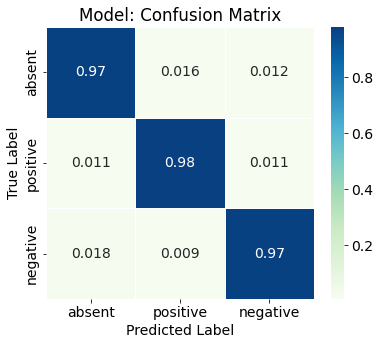

In [32]:
import pandas as pd
from scipy import stats

import seaborn 
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn import preprocessing

LABELS = ["absent","positive","negative"]
cmap="GnBu"

def show_confusion_matrix(validations, predictions, label="Model"):

    matrix = metrics.confusion_matrix(validations, predictions, normalize='true')
    plt.figure(figsize=(6, 5))
    seaborn.heatmap(matrix,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                #fmt='d',
                linecolor='white',
                linewidths=1,
                cmap=cmap)
    plt.title(label+': Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_val = model.predict(x_val)
# Take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)

show_confusion_matrix(max_y_val, max_y_pred_val)

#print(classification_report(max_y_val, max_y_pred_val))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cb9264e-65a5-431d-a980-16667908489e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>